## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [2]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [ ]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [ ]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

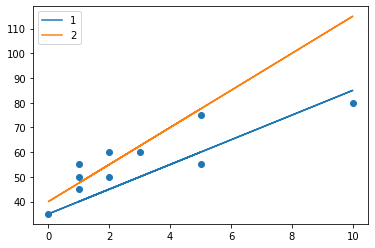

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [ ]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [ ]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [ ]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [ ]:
X.shape

(2, 10)

In [ ]:
X.T.shape

(10, 2)

In [ ]:
all(X @ y == np.dot(X,y))

True

In [ ]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [ ]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

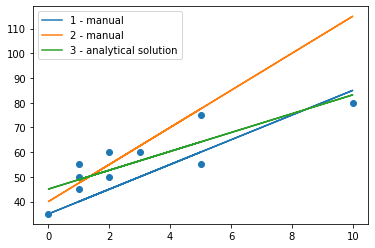

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [19]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [ ]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [ ]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [ ]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96874999999999)

Градиентный спуск

In [ ]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [ ]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [20]:
from sklearn.model_selection import ParameterGrid

In [28]:
param_grid = {'alpha': [1e-2, 1e-3, 1e-4], 'n_iter': [100, 500, 800, 1000, 4000]}
pg = ParameterGrid(param_grid)
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nInitial weights = {W} \n')

for params in list(pg):
    alpha, n_iter = params['alpha'], params['n_iter']
    print('\n', '='*10, f'Learning rate: {alpha}, number of iterations: {n_iter}', '='*10)
    for i in range(n_iter):
        y_pred = np.dot(W, X)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
        err = calc_mse(y, y_pred)
        #if i % 100 == 0:
        #    alpha /= 1.1
        #    print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    print(f'Iteration {i}: W_new = {W}, MSE = {round(err, 2)}')

# ========== Learning rate: 0.001, number of iterations: 100 ==========

Number of objects = 10        
Initial weights = [1.  0.5] 


 ========== Learning rate: 0.01, number of iterations: 100 ==========
Iteration 99: W_new = [28.22929764  6.86494171], MSE = 179.9

 ========== Learning rate: 0.01, number of iterations: 500 ==========
Iteration 499: W_new = [44.89002963  3.84377484], MSE = 43.98

 ========== Learning rate: 0.01, number of iterations: 800 ==========
Iteration 799: W_new = [45.06238687  3.81252052], MSE = 43.97

 ========== Learning rate: 0.01, number of iterations: 1000 ==========
Iteration 999: W_new = [45.06249999  3.8125    ], MSE = 43.97

 ========== Learning rate: 0.01, number of iterations: 4000 ==========
Iteration 3999: W_new = [45.0625  3.8125], MSE = 43.97

 ========== Learning rate: 0.001, number of iterations: 100 ==========
Iteration 99: W_new = [45.0625  3.8125], MSE = 43.97

 ========== Learning rate: 0.001, number of iterations: 500 ==========
Iteration 499: W_new = [45.0625  3.8125], MSE = 43.97

 ========== Learning rate: 0

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [40]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1000):
    y_pred = np.dot(W, X)  # [2,] x [2,10] -> [10,]
    err = calc_mse(y, y_pred)
    W -= alpha * (2/n * np.sum(X.T * (y_pred - y).reshape(X.T.shape[0],1), axis=0)) # ... * sum_row [10,2]*[10,1]=[2,]
    #error = (y_pred - y) # или так
    #W -= alpha * (2/n * X.dot(error)) # [2,10]x[10,] -> [2,]
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #700: W_new = [44.99413322  3.82489726], MSE = 43.97
Iteration #800: W_new = [45.03515017  3.81745947], MSE = 43.97
Iteration #900: W_new = [45.05155882  3.81448401], MSE = 43.97


*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [42]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
eps = 0.00001

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    if i>0 and np.abs(err - error) < eps:
        break
    W -= alpha * (2/n * np.sum(X.T * (y_pred - y).reshape(X.T.shape[0],1), axis=0))
    error = err
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #700: W_new = [44.99413322  3.82489726], MSE = 43.97


### Более продвинутые способы

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.transpose(1,0), y)
y_pred = lr.predict(X.transpose(1,0))
print(calc_mse(y, y_pred))

43.96875000000001


#### самодельная регрессия

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomLinearRegression(BaseEstimator, TransformerMixin): # наследование для работы в пайплайне
    def __init__(self, eta=0.001, epochs=20, l2=0., seed=None, patience=15, min_delta=0.0,
                 eta_factor=0.1, eta_patience=15, eta_min_delta=0.0, min_eta=1e-8):
        self.eta = eta # скорость обучения
        self.epochs = epochs # количество эпох обучения
        self.random = np.random.RandomState(seed) # воспроизводимость
        self.min_loss = np.inf
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.counter_eta = 0
        self.l2 = l2 # коэффициент регуляризации
        self.eta_factor = eta_factor
        self.eta_patience = eta_patience
        self.eta_min_delta = eta_min_delta
        self.min_eta = min_eta
        self.best_weights = None
        assert self.min_eta < self.eta, 'Set learning rate higher than min_learning_rate.'
    def fit(self, X, y):
        self.weights = self.random.normal(loc=0.0, scale=0.01, # инициализируем веса близкими к 0 с нормальным распределением
                                      size=(1 + X.shape[1]))

        self.losses = []
        for _ in range(self.epochs):
            output = self.input_(X) # выисляем выход сети 
            errors = (output - y) # вычисляем ошибку
            grad = (X.T.dot(errors) + self.l2 * self.weights[1:]) # вычисляем градиент + регуляризация (np.sign(weights[1:]) для L1) / *2/X.shape[0]
            self.weights[1:] -= self.eta * grad  # обновляем веса умножаем на скорость обучения
            self.weights[0] -= self.eta * errors.sum() # bias не регуляризируется
            l2_term = self.l2 * np.sum(self.weights[1:]**2) # параметр L2 для целевой функции
            loss = (errors**2).sum() / 2.0 + l2_term # вычисление среднекв-ой ошибки (которую мы стремимся миниминзировать)
            self.losses.append(loss) # собираем значения потерь, чтобы их потом визуализировать
            if loss - self.min_loss < self.min_delta:
                self.min_loss = loss
                self.best_weights = self.weights.copy()
                self.counter = 0
                self.counter_eta = 0
            else:
                self.counter += 1
                self.counter_eta += 1
            if self.counter == self.patience:
                self.weights = self.best_weights
                print(f'Loss did not improve for {self.patience} epochs. Training stopped.')
                break
            if self.counter_eta == self.eta_patience:
                self.eta *= self.eta_factor
            if self.eta <= self.min_eta:
                self.weights = self.best_weights
                print(f'Learning rate is equal to min_learning rate: {self.eta}, training stopped')
                break
        return self
    def input_(self, X): # <X,W> = x1 * w1 + x2 * w2 + ... + b
        return np.dot(X, self.weights[1:]) + self.weights[0]
    def predict(self, X): # вычисление вывода - линейная активация
        return self.input_(X)

In [44]:
lr = CustomLinearRegression(eta=0.01, epochs=800)
lr.fit(X.transpose(1,0), y)
print(calc_mse(y, lr.predict(X.transpose(1,0))))

Loss did not improve for 15 epochs. Training stopped.
43.96875


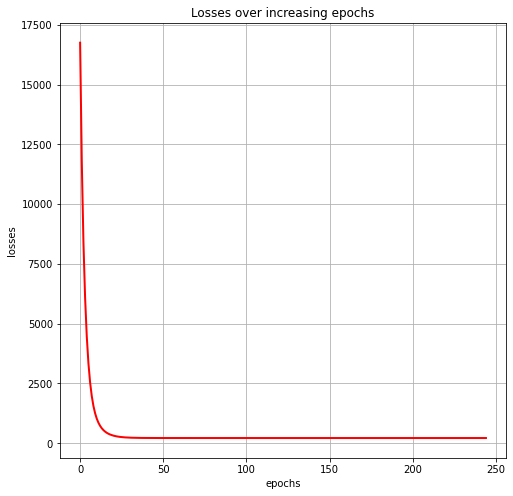

In [49]:
plt.figure(figsize=(8,8))
plt.title('Losses over increasing epochs')
plt.plot(np.arange(245), lr.losses, lw=2, c='red')  # 245 из-за ранней остановки
plt.xlabel('epochs')
plt.ylabel('losses')
plt.grid()
plt.show()

In [45]:
# можно так, вычислять градиенты с помощью PyTorch, хотя на таком наборе данных это явно! избыточно
import torch
import torch.nn as nn

In [46]:
Xt = torch.as_tensor(X.T, dtype=torch.float32)
yt = torch.as_tensor(y, dtype=torch.float32).view(-1, 1)

model = nn.Sequential(nn.Linear(2, 1),).to('cpu')

opt = torch.optim.SGD(model.parameters(), lr=0.01) # стохастический градиентный спуск
loss_fn = nn.MSELoss()

model.train()

for i in range(600):
    opt.zero_grad()

    out = model(Xt)
    loss = loss_fn(out, yt)
    loss.backward()
    opt.step()

    if (i+1) % 100 == 0:
        print(f'MSE loss = {loss.item():.6f}')

MSE loss = 67.621536
MSE loss = 44.638592
MSE loss = 43.987717
MSE loss = 43.969288
MSE loss = 43.968765
MSE loss = 43.968754


Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает

В данной модели мы фактически можем повлиять на качество путем подбора гиперпараметров (скорость обучения - чтобы не слишком долго идти к сходимости и не пропустить глобальный минимум, количестсво эпох - сколько шагов делать к минимуму), либо путем обработки входных данных: масштабирование, обработка выбросов, генерация новых признаков (в т.ч. полиномиальных - для линейной модели, пытающейся описать нелинейную зависимость), регуляризация (для оптимизации - борьба с переобучением, модели для работы с новыми данными) и т.п.